# Importing Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

import os
import sys
from pathlib import Path  

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Activation
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint



# Data preparation

In [ ]:
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
# Paths for data
Ravdess = "/content/drive/MyDrive/iop/dataset/ravdess-emotional-speech-audio/audio_speech_actors_01-24"
Crema = "/content/drive/MyDrive/iop/dataset/cremad/AudioWAV/"
Tess = "/content/drive/MyDrive/iop/dataset/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/content/drive/MyDrive/iop/dataset/surrey-audiovisual-expressed-emotion-savee/ALL/"

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + '/' + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_path.append(Ravdess + '/' + dir + '/' + file)
        # third part in each file represents the emotion associated to that file.
        if int(part[2]) == 1:
            file_emotion.append('neutral')
        elif int(part[2]) == 2:
            file_emotion.append('calm')
        elif int(part[2]) == 3:
            file_emotion.append('happy')
        elif int(part[2]) == 4:
            file_emotion.append('sad')
        elif int(part[2]) == 5:
            file_emotion.append('angry')
        elif int(part[2]) == 6:
            file_emotion.append('fear')
        elif int(part[2]) == 7:
            file_emotion.append('disgust')
        elif int(part[2]) == 8:
            file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.head()

Emotions                                               Path
0  neutral  /content/drive/MyDrive/iop/dataset/ravdess-emo...
1    happy  /content/drive/MyDrive/iop/dataset/ravdess-emo...
2     calm  /content/drive/MyDrive/iop/dataset/ravdess-emo...
3    happy  /content/drive/MyDrive/iop/dataset/ravdess-emo...
4    happy  /content/drive/MyDrive/iop/dataset/ravdess-emo...

In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0      sad  /content/drive/MyDrive/iop/dataset/cremad/Audi...
1  disgust  /content/drive/MyDrive/iop/dataset/cremad/Audi...
2     fear  /content/drive/MyDrive/iop/dataset/cremad/Audi...
3  disgust  /content/drive/MyDrive/iop/dataset/cremad/Audi...
4    angry  /content/drive/MyDrive/iop/dataset/cremad/Audi...

In [ ]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0  surprise  /content/drive/MyDrive/iop/dataset/toronto-emo...
1  surprise  /content/drive/MyDrive/iop/dataset/toronto-emo...
2  surprise  /content/drive/MyDrive/iop/dataset/toronto-emo...
3  surprise  /content/drive/MyDrive/iop/dataset/toronto-emo...
4  surprise  /content/drive/MyDrive/iop/dataset/toronto-emo...

In [ ]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                               Path
0    angry  /content/drive/MyDrive/iop/dataset/surrey-audi...
1    angry  /content/drive/MyDrive/iop/dataset/surrey-audi...
2    angry  /content/drive/MyDrive/iop/dataset/surrey-audi...
3    angry  /content/drive/MyDrive/iop/dataset/surrey-audi...
4    angry  /content/drive/MyDrive/iop/dataset/surrey-audi...

In [4]:
dfilepath = Path("/content/drive/MyDrive/iop/data_path.csv")  
dfilepath.parent.mkdir(parents=True, exist_ok=True) 

In [ ]:
# combining all the 4 dataframes we created so far into one.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0) 
# saving data_path dataframe
data_path.to_csv(dfilepath,index=False)
data_path.head()

Emotions                                               Path
0  neutral  /content/drive/MyDrive/iop/dataset/ravdess-emo...
1    happy  /content/drive/MyDrive/iop/dataset/ravdess-emo...
2     calm  /content/drive/MyDrive/iop/dataset/ravdess-emo...
3    happy  /content/drive/MyDrive/iop/dataset/ravdess-emo...
4    happy  /content/drive/MyDrive/iop/dataset/ravdess-emo...

In [5]:
# loading Features dataframe
data_path = pd.read_csv(dfilepath)
data_path.head()

Emotions                                               Path
0  neutral  /content/drive/MyDrive/iop/dataset/ravdess-emo...
1    happy  /content/drive/MyDrive/iop/dataset/ravdess-emo...
2     calm  /content/drive/MyDrive/iop/dataset/ravdess-emo...
3    happy  /content/drive/MyDrive/iop/dataset/ravdess-emo...
4    happy  /content/drive/MyDrive/iop/dataset/ravdess-emo...

# Data Visualisation

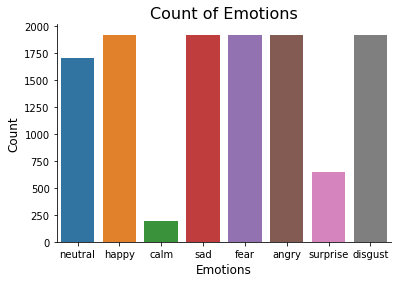

In [6]:
plt.title('Count of Emotions', size=16)
sns.countplot(x=data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

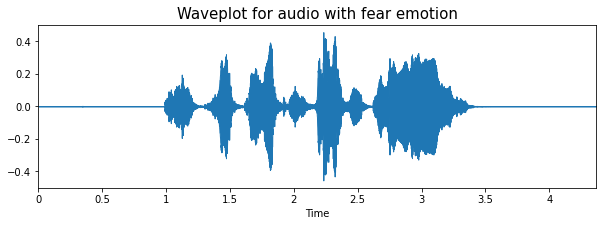

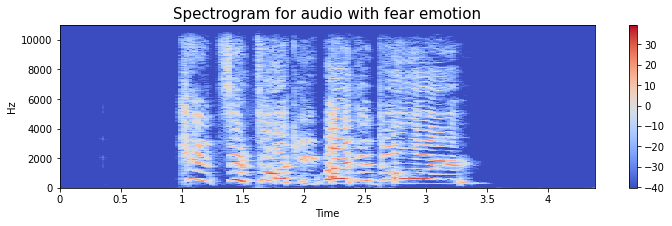

In [ ]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

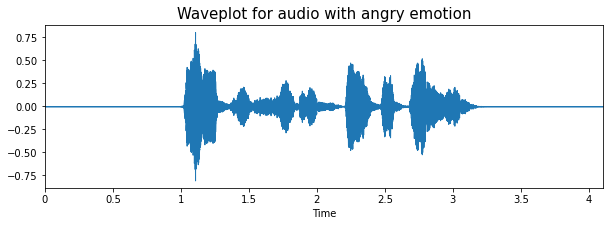

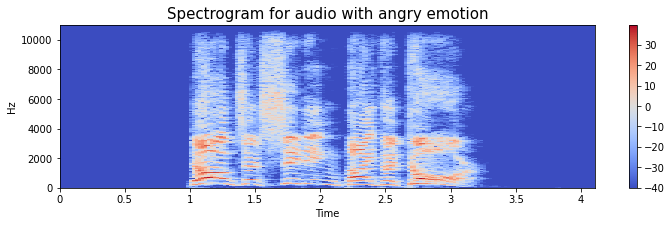

In [ ]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


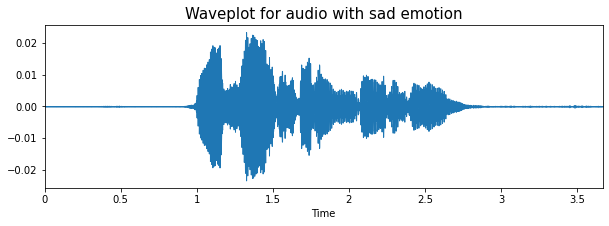

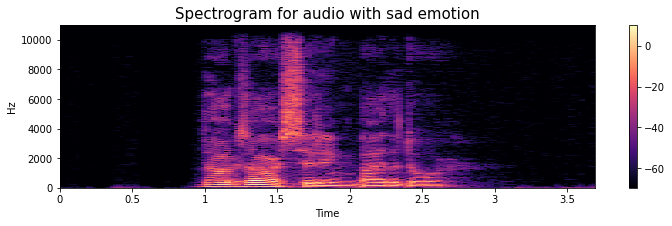

In [ ]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

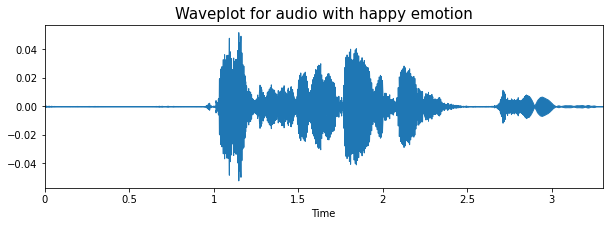

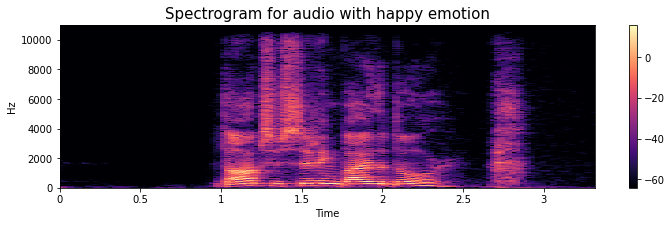

In [ ]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# Data Augmentation

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

Simple Audio

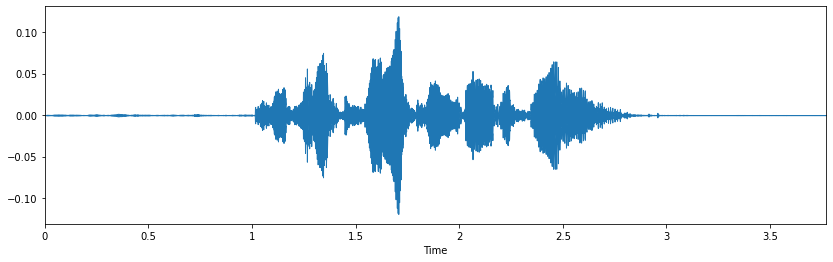

In [ ]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

Noise Injection

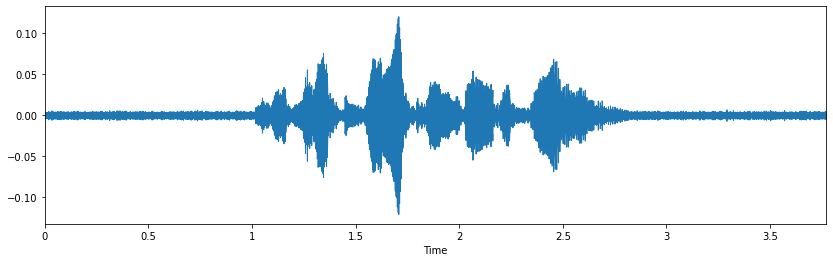

In [ ]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

Stretching

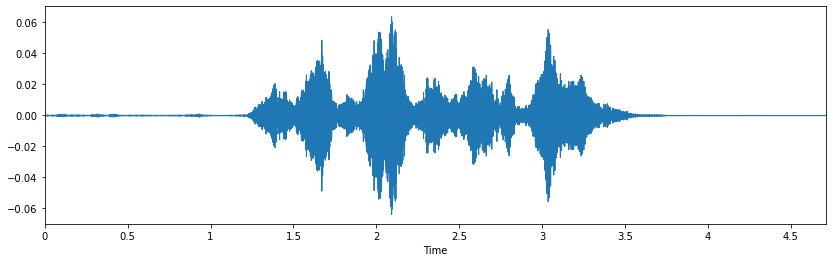

In [ ]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

Shifting

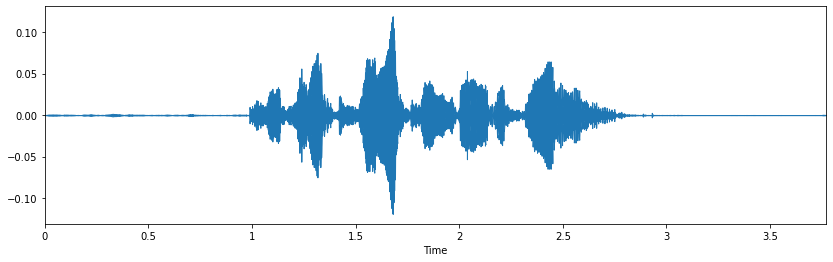

In [ ]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

Pitch

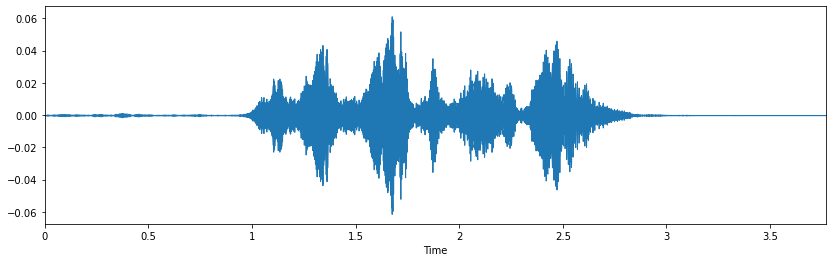

In [ ]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#Feature Extraction

In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

/usr/local/lib/python3.8/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


In [ ]:
len(X), len(Y), data_path.Path.shape

(36486, 36486, (12162,))

In [8]:
ffilepath = Path("/content/drive/MyDrive/iop/features.csv")  
ffilepath.parent.mkdir(parents=True, exist_ok=True)

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y  
# saving Features dataframe 
Features.to_csv(ffilepath, index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.177192  0.591992  0.583658  0.648653  0.612564  0.606491  0.598885   
1  0.278659  0.680155  0.643244  0.718617  0.714692  0.732286  0.680251   
2  0.094737  0.655310  0.581485  0.579693  0.650118  0.576461  0.579680   
3  0.102837  0.518133  0.593201  0.634853  0.603979  0.552458  0.571265   
4  0.232734  0.667117  0.723931  0.727005  0.691787  0.670480  0.607099   

          7         8         9  ...       153           154       155  \
0  0.595120  0.673869  0.776408  ...  0.000006  1.234110e-05  0.000021   
1  0.589438  0.634272  0.729938  ...  0.000021  2.621107e-05  0.000035   
2  0.536875  0.532180  0.644020  ...  0.000003  9.575350e-07  0.000002   
3  0.560466  0.572103  0.627599  ...  0.000130  1.215777e-04  0.000186   
4  0.588496  0.644860  0.674054  ...  0.000259  2.421162e-04  0.000301   

        156       157       158       159           160           161   labels  
0  0.000035  0.000035  0.000013  0.000003  3.316523e-07  3.537870e-09  neutral  
1  0.000051  0.000049  0.000026  0.000017  1.397370e-05  1.384956e-05  neutral  
2  0.000005  0.000007  0.000006  0.000002  3.903767e-08  3.357863e-10  neutral  
3  0.000215  0.000407  0.000358  0.000036  2.303066e-06  2.386698e-08    happy  
4  0.000330  0.000517  0.000469  0.000147  1.153765e-04  1.141886e-04    happy  

[5 rows x 163 columns]

In [9]:
# loading Features dataframe 
Features = pd.read_csv(ffilepath)
Features.head()

0         1         2         3         4         5         6  \
0  0.177192  0.591992  0.583658  0.648653  0.612564  0.606491  0.598885   
1  0.278659  0.680155  0.643244  0.718617  0.714692  0.732286  0.680251   
2  0.094737  0.655310  0.581485  0.579693  0.650118  0.576461  0.579680   
3  0.102837  0.518133  0.593201  0.634853  0.603979  0.552458  0.571265   
4  0.232734  0.667117  0.723931  0.727005  0.691787  0.670480  0.607099   

          7         8         9  ...       153           154       155  \
0  0.595120  0.673869  0.776408  ...  0.000006  1.234110e-05  0.000021   
1  0.589438  0.634272  0.729938  ...  0.000021  2.621107e-05  0.000035   
2  0.536875  0.532180  0.644020  ...  0.000003  9.575350e-07  0.000002   
3  0.560466  0.572103  0.627599  ...  0.000130  1.215777e-04  0.000186   
4  0.588496  0.644860  0.674054  ...  0.000259  2.421162e-04  0.000301   

        156       157       158       159           160           161   labels  
0  0.000035  0.000035  0.000013  0.000003  3.316523e-07  3.537870e-09  neutral  
1  0.000051  0.000049  0.000026  0.000017  1.397370e-05  1.384956e-05  neutral  
2  0.000005  0.000007  0.000006  0.000002  3.903767e-08  3.357863e-10  neutral  
3  0.000215  0.000407  0.000358  0.000036  2.303066e-06  2.386698e-08    happy  
4  0.000330  0.000517  0.000469  0.000147  1.153765e-04  1.141886e-04    happy  

[5 rows x 163 columns]

# Data Preparation

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

#Creating the model

In [ ]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(x_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1])) # Target class number
model.add(Activation('softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

In [11]:
mfilepath = Path("/content/drive/MyDrive/iop/saved_model/cnn1d.h5")  
mfilepath.parent.mkdir(parents=True, exist_ok=True)

In [10]:
#saving the model
model.save(mfilepath)

NameError: ignored

In [12]:
#loading the model
model = keras.models.load_model(mfilepath)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          2304      
                                                                 
 activation (Activation)     (None, 162, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 162, 256)          524544    
                                                                 
 batch_normalization (BatchN  (None, 162, 256)         1024      
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 162, 256)          0         
                                                                 
 dropout (Dropout)           (None, 162, 256)          0         
                                                        

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

286/286 [==============================] - 10s 5ms/step - loss: 1.0049 - accuracy: 0.6983
Accuracy of our model on test data :  69.83117461204529 %


In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

286/286 [==============================] - 1s 3ms/step


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0          neutral       neutral
1          neutral       neutral
2         surprise      surprise
3             fear          fear
4             fear          fear
5          disgust       neutral
6             fear       disgust
7            happy         happy
8            happy         happy
9          neutral       neutral

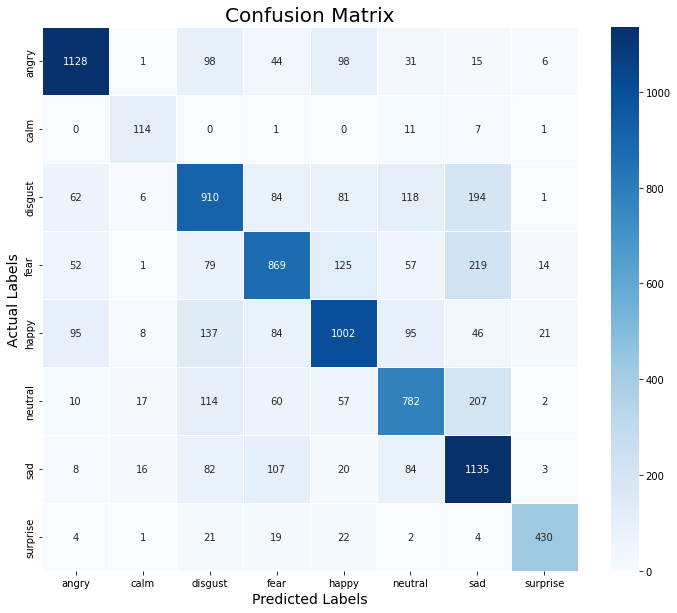

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.83      0.79      0.81      1421
        calm       0.70      0.85      0.77       134
     disgust       0.63      0.62      0.63      1456
        fear       0.69      0.61      0.65      1416
       happy       0.71      0.67      0.69      1488
     neutral       0.66      0.63      0.64      1249
         sad       0.62      0.78      0.69      1455
    surprise       0.90      0.85      0.88       503

    accuracy                           0.70      9122
   macro avg       0.72      0.73      0.72      9122
weighted avg       0.70      0.70      0.70      9122

